# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [3]:
print(cities)

['robertsport', 'ribeira grande', 'butaritari', 'busselton', 'taolanaro', 'rikitea', 'saskylakh', 'sao jose da coroa grande', 'kahului', 'sentyabrskiy', 'palmer', 'jamestown', 'muravlenko', 'ulcinj', 'albury', 'ostrovnoy', 'bluff', 'tuktoyaktuk', 'kapaa', 'albany', 'huambo', 'bambous virieux', 'vanimo', 'tsihombe', 'bengkulu', 'narsaq', 'male', 'kautokeino', 'barrow', 'yellowknife', 'sorland', 'nattarasankottai', 'hobart', 'beloslav', 'faanui', 'roma', 'esperance', 'victoria', 'katsuura', 'utiroa', 'klaksvik', 'vaini', 'bouca', 'atuona', 'upington', 'hasaki', 'taoudenni', 'saint-philippe', 'ushuaia', 'illoqqortoormiut', 'hilo', 'puerto ayora', 'te anau', 'mataura', 'constantine', 'toronto', 'avarua', 'sur', 'sisimiut', 'nanortalik', 'lolua', 'bhuj', 'chuy', 'ulaanbaatar', 'port alfred', 'sinnamary', 'dingle', 'tasiilaq', 'gizo', 'thompson', 'hithadhoo', 'ulaangom', 'havelock', 'nikolskoye', 'tecoanapa', 'arraial do cabo', 'cherskiy', 'aquiraz', 'baragua', 'iqaluit', 'lebu', 'charters t

In [4]:

# Define Imperial units as we requires Max Temperature in Fahrenheit and Wind Speed in mph
units = "imperial"

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url with units, api key and city name as parameter
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Define lists to save JSON response
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []

# Setting up For loop to make successive API calls and print processing log
# Since only 60 API calls can be made per min, we are creating sets of 50 cities and iterating through them
# Use time.sleep method to keep intervals between each API call
# Use Try Except loop to print cities whose response is not available and we might get potential error
# Append lists with JSON response

print("Beginning Data Retrieval\n"
      "------------------------------")

for i, city in enumerate(cities, start = 1):
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    
    try:
        response = requests.get(query_url).json()
        #print(query_url)
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.5)
        
        print(f"Data found. Processing Record {i} | {city}")
    
        
    
    except KeyError:
    
        print(f"Skipping... Record {i} | {city} not found. ")
        pass
    
    

print("------------------------------\n"
      "Data Retrieval Complete\n"
      "------------------------------")

Beginning Data Retrieval
------------------------------
Data found. Processing Record 1 | robertsport
Data found. Processing Record 2 | ribeira grande
Data found. Processing Record 3 | butaritari
Data found. Processing Record 4 | busselton
Skipping... Record 5 | taolanaro not found. 
Data found. Processing Record 6 | rikitea
Data found. Processing Record 7 | saskylakh
Data found. Processing Record 8 | sao jose da coroa grande
Data found. Processing Record 9 | kahului
Skipping... Record 10 | sentyabrskiy not found. 
Data found. Processing Record 11 | palmer
Data found. Processing Record 12 | jamestown
Data found. Processing Record 13 | muravlenko
Data found. Processing Record 14 | ulcinj
Data found. Processing Record 15 | albury
Data found. Processing Record 16 | ostrovnoy
Data found. Processing Record 17 | bluff
Data found. Processing Record 18 | tuktoyaktuk
Data found. Processing Record 19 | kapaa
Data found. Processing Record 20 | albany
Data found. Processing Record 21 | huambo
Data

In [6]:
#print(f"The latitude information received is: {lat}")

In [7]:
# created a data frame from a dictionary (from cities in city list, lat, lng, temp,humid, clouds, wind_sp, country, date) 

weather_dict = {"City ID": city_id, "City": city_name, "Latitude": lat, "Longitude": lon, "Max Temp" : max_temp,"Humidity": humidity, "Cloudiness" : cloudiness, "Wind Speed" : wind_speed, "Country" : country, "Date":  date}


weather_data= pd.DataFrame(weather_dict)

weather_data

,City ID,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2274275,Robertsport,6.7533,-11.3686,78.55,73,95,9.37,LR,1629050049
1,3372707,Ribeira Grande,38.5167,-28.7000,77.40,69,40,4.61,PT,1629050050
2,2110227,Butaritari,3.0707,172.7902,82.36,74,11,9.01,KI,1629050051
3,2075265,Busselton,-33.6500,115.3333,50.09,82,0,10.25,AU,1629050052
4,4030556,Rikitea,-23.1203,-134.9692,74.61,75,0,12.95,PF,1629050052
...,...,...,...,...,...,...,...,...,...,...
545,696643,Poltava,49.5937,34.5407,72.66,34,77,5.01,UA,1629050476
546,1185095,Teknāf,20.8624,92.3058,79.83,90,100,8.95,BD,1629050476
547,1607617,Phon,15.8160,102.5998,74.79,93,100,5.75,TH,1629050477
548,3671450,Inírida,3.8653,-67.9239,83.88,72,88,1.54,CO,1629050478


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data.to_csv("../output_data/weather_data.csv")

In [11]:
weather_data[["Latitude","Longitude","Max Temp","Humidity",'Cloudiness','Wind Speed', 'Date']].describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.255322,14.244007,70.826291,70.914545,57.298182,7.544982,1.629050e+09
std,32.652681,92.013682,14.577029,20.882924,37.696349,5.165353,1.335352e+02
min,-54.800000,-179.166700,32.320000,7.000000,0.000000,0.000000,1.629050e+09
25%,-6.897000,-66.427400,60.175000,61.000000,20.000000,3.547500,1.629050e+09
50%,22.733450,16.637800,74.275000,75.500000,71.000000,6.510000,1.629050e+09
75%,47.854175,100.297375,80.615000,87.000000,93.000000,10.360000,1.629050e+09
max,78.218600,178.416700,112.570000,100.000000,100.000000,28.500000,1.629050e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
There are no cities with humidity > 100 , so no need to revise dataframe

In [21]:
df_humity_over_100 = weather_data[weather_data["Humidity"] > 100]
df_humity_over_100

,City ID,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [35]:

ts = int(weather_data["Date"][0])

data_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')
data_date

'08/15/2021'

## Latitude vs. Temperature Plot

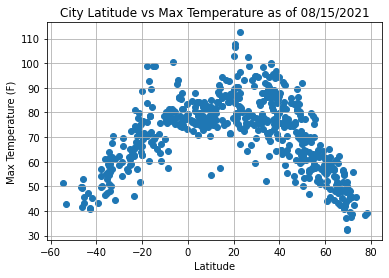

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(weather_data.iloc[:,2],weather_data.iloc[:,4])
plt.title("City Latitude vs Max Temperature as of " + data_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid(True)
plt.show()
plt.savefig("../Images/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

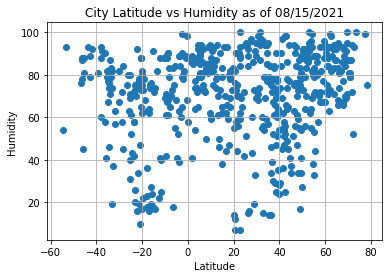

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(weather_data.iloc[:,2],weather_data.iloc[:,5])
plt.title("City Latitude vs Humidity as of " + data_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.grid(True)
plt.show()
plt.savefig("../Images/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

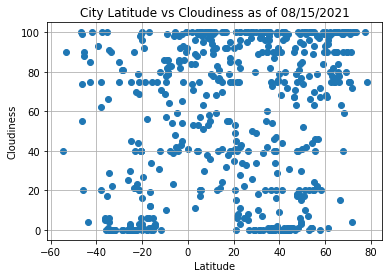

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(weather_data.iloc[:,2],weather_data.iloc[:,6])
plt.title("City Latitude vs Cloudiness as of " + data_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid(True)
plt.show()
plt.savefig("../Images/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

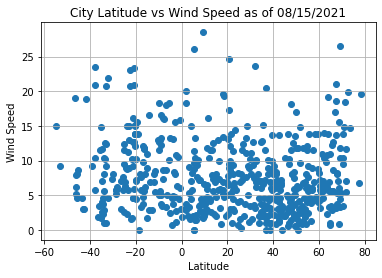

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(weather_data.iloc[:,2],weather_data.iloc[:,7])
plt.title("City Latitude vs Wind Speed as of " + data_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.grid(True)
plt.show()
plt.savefig("../Images/Lat_vs_WindSpeed.png")

## Linear Regression

In [50]:

#dataframe for cities located on Northern Hemisphere
northern_hem = weather_data[weather_data["Latitude"]>=0]
northern_hem

,City ID,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2274275,Robertsport,6.7533,-11.3686,78.55,73,95,9.37,LR,1629050049
1,3372707,Ribeira Grande,38.5167,-28.7000,77.40,69,40,4.61,PT,1629050050
2,2110227,Butaritari,3.0707,172.7902,82.36,74,11,9.01,KI,1629050051
5,2017155,Saskylakh,71.9167,114.0833,45.61,72,4,7.05,RU,1629050053
7,5847411,Kahului,20.8947,-156.4700,76.26,90,15,9.55,US,1629050055
...,...,...,...,...,...,...,...,...,...,...
545,696643,Poltava,49.5937,34.5407,72.66,34,77,5.01,UA,1629050476
546,1185095,Teknāf,20.8624,92.3058,79.83,90,100,8.95,BD,1629050476
547,1607617,Phon,15.8160,102.5998,74.79,93,100,5.75,TH,1629050477
548,3671450,Inírida,3.8653,-67.9239,83.88,72,88,1.54,CO,1629050478


In [51]:
#dataframe for cities located on Southern Hemisphere
southern_hem = weather_data[weather_data["Latitude"]<0]
southern_hem

,City ID,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,2075265,Busselton,-33.6500,115.3333,50.09,82,0,10.25,AU,1629050052
4,4030556,Rikitea,-23.1203,-134.9692,74.61,75,0,12.95,PF,1629050052
6,3388456,São José da Coroa Grande,-8.8978,-35.1478,77.72,68,79,13.27,BR,1629050054
12,2178174,Albury,-36.0833,146.9167,46.31,90,5,3.44,AU,1629050059
14,2206939,Bluff,-46.6000,168.3333,49.80,76,100,18.97,NZ,1629050061
...,...,...,...,...,...,...,...,...,...,...
522,3948448,Acolla,-11.7319,-75.5463,60.17,40,71,8.55,PE,1629050457
525,933102,Sekoma,-24.4000,23.8833,63.81,43,0,8.97,BW,1629050460
534,1056899,Sambava,-14.2667,50.1667,69.93,74,2,16.64,MG,1629050468
541,3391889,Pitimbu,-7.4706,-34.8086,78.21,70,83,15.99,BR,1629050473


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'st' is not defined

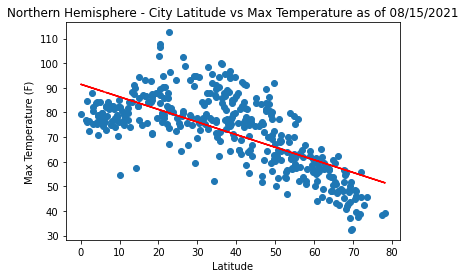

In [56]:
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
plt.title("Northern Hemisphere - City Latitude vs Max Temperature as of " + data_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
latitude_NH = northern_hem.iloc[:,2]
max_temp_NH = northern_hem.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_NH, max_temp_NH)
regress_values = latitude_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude_NH,regress_values,"r-")
correlation = st.pearsonr(latitude_NH,max_temp_NH)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Population and # of June 2021 NJ Cases is {round(correlation[0],2)}")


plt.grid(True)
plt.show()
plt.savefig("../Images/NHLat_vs_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


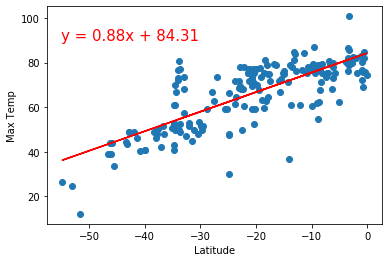

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


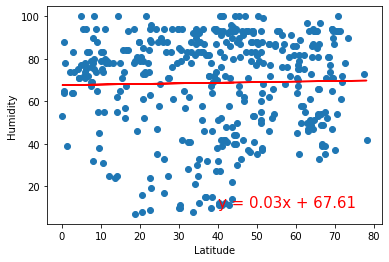

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


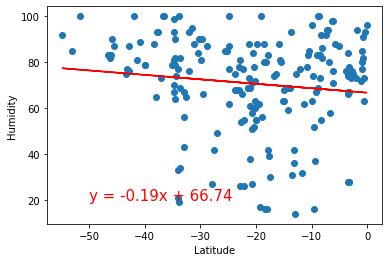

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


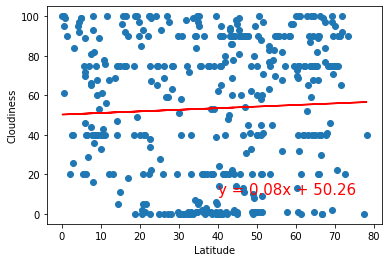

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


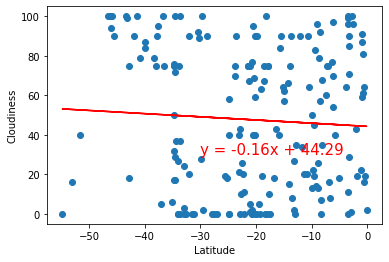

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


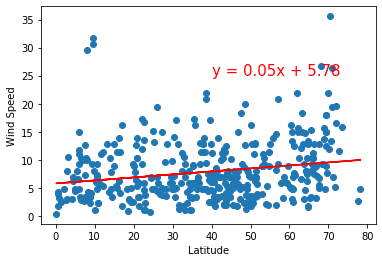

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


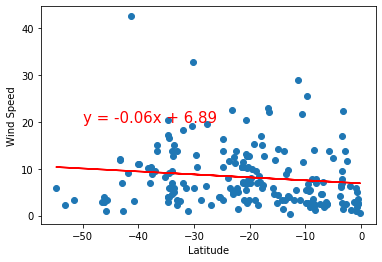